In [15]:
import numpy as np
import os 
import cv2
import skimage
import matplotlib.pyplot as plt
from glob import glob
import csv
import pandas as pd

#active contour sk-image
from sklearn.decomposition import PCA
import plotly.express as px

In [30]:
def mousePoints(event,x,y,flags,param):
    #Crop image
    global refPt
    global image
    # Left button click
    if event == cv2.EVENT_LBUTTONDOWN:
        refPt = [(x, y)]
    elif event == cv2.EVENT_LBUTTONUP:
        refPt.append((x, y))
        final_boundaries.append((refPt[0],refPt[1]))
        cv2.rectangle(frame, refPt[0], refPt[1], (0, 255, 0), 10)
        cv2.imshow("win", frame)
    elif event == cv2.EVENT_MOUSEMOVE and flags == cv2.EVENT_FLAG_LBUTTON:
        clone = frame.copy()
        cv2.rectangle(clone, refPt[0], (x, y), (0, 255, 0), 10)
        cv2.imshow("win", clone)

def saveData(fig, figPath, mask):
    
    root = "//home.org.aalto.fi/lehtona6/data/Desktop/InstruRound"
    nameResult = os.path.join(root,"results")
    name = nameResult
    tags = os.path.split(figPath)[0].split(os.sep)[-3:]
    aName=(os.path.split(figPath)[1][:-4])
    aName2=(os.path.split(figPath)[1][:-4])
    aName += ".png"
    aName2 += "contour.npy"
    tags.append(os.path.split(figPath)[1][:-4])   
    
    for j in tags:
        name = os.path.join(name,j)
        
    
    if not os.path.exists(os.path.split(name)[0]):
        os.makedirs(os.path.split(name)[0])

    np.save(os.path.join(os.path.split(name)[0],aName2), mask)
    
    fig.savefig((os.path.join(os.path.split(name)[0],aName)))
    print("fig path",(os.path.join(os.path.split(name)[0],aName)), "\nnumpy dump", os.path.join(os.path.split(name)[0],aName2))

In [31]:
#figs = glob("//home.org.aalto.fi/lehtona6/data/Desktop/InstruData/0123/*.tif")
figs = glob("//home.org.aalto.fi/lehtona6/data/Desktop/InstruRound/*/*/*/*/*.tif")



In [32]:
#index of analzedimage 4
indexImg = 0
filterCoef = 5
flipFilter = True

img = bf

imgfinal = img.copy()
frame = img.copy()

#global final_boundaries
final_boundaries = []

cv2.namedWindow('win',cv2.WINDOW_NORMAL)
cv2.setMouseCallback("win", mousePoints)

cv2.imshow("win",frame)

k = cv2.waitKey(0)       
# Destroying present windows on screen
cv2.destroyAllWindows()

In [71]:
 np.arange(imgfinal.max()*0.97,imgfinal.max()*0.985,0.01)

array([178.48, 178.58, 178.68, 178.78, 178.88, 178.98, 179.08, 179.18,
       179.28, 179.38, 179.48, 179.58, 179.68, 179.78, 179.88, 179.98,
       180.08, 180.18, 180.28, 180.38, 180.48, 180.58, 180.68, 180.78,
       180.88, 180.98, 181.08, 181.18])

[[array([[[298, 759]],

       [[298, 760]],

       [[297, 761]],

       [[297, 762]],

       [[297, 763]],

       [[296, 764]],

       [[295, 765]],

       [[294, 765]],

       [[293, 765]],

       [[292, 766]],

       [[291, 766]],

       [[291, 767]],

       [[292, 766]],

       [[293, 767]],

       [[294, 767]],

       [[295, 767]],

       [[296, 768]],

       [[297, 769]],

       [[297, 770]],

       [[297, 771]],

       [[298, 772]],

       [[297, 773]],

       [[297, 774]],

       [[298, 774]],

       [[299, 774]],

       [[300, 773]],

       [[301, 774]],

       [[302, 774]],

       [[301, 773]],

       [[301, 772]],

       [[302, 771]],

       [[302, 770]],

       [[302, 769]],

       [[303, 768]],

       [[304, 767]],

       [[304, 766]],

       [[304, 765]],

       [[303, 764]],

       [[304, 763]],

       [[303, 763]],

       [[302, 763]],

       [[301, 762]],

       [[300, 761]],

       [[300, 760]],

       [[300, 759]],

       [

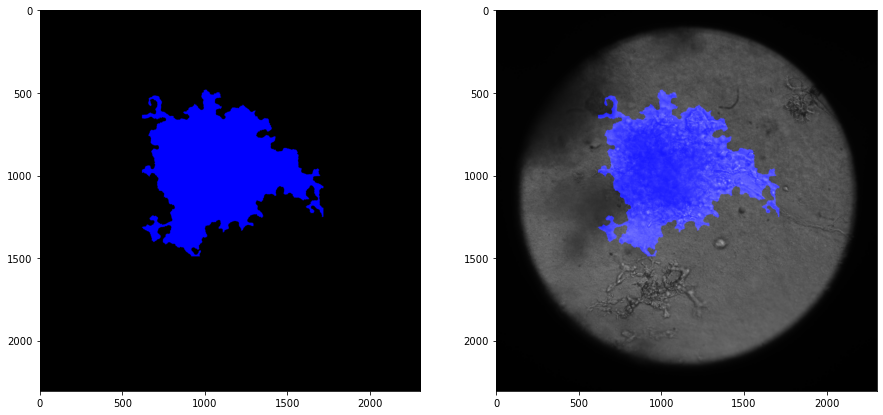

In [78]:
#threshold =  np.arange(imgfinal.max()*0.97,imgfinal.max()*0.99,0.1)
#threshold = np.array([99.825e-2,99.85e-2])
fig, ax = plt.subplots(1, 2,figsize=(15, 10))
imgPlot = imgfinal.copy()

masks = []

for j in range(len(final_boundaries)):
    
    crop = imgfinal[final_boundaries[j][0][1]:final_boundaries[j][1][1],final_boundaries[j][0][0]:final_boundaries[j][1][0],:].copy()
    cropBW = skimage.color.rgb2gray(crop)

    g = skimage.filters.gaussian(cropBW,filterCoef)

    edges = skimage.filters.farid(g)
    imgRef = 1-edges
    #print(imgRef)
    threshold =  np.arange(imgRef.max()*0.99,imgRef.max(),0.0001)
    #ret, thresh1 = cv2.threshold(crop[:,:,0], 120, 255, cv2.THRESH_BINARY + 
    #                                        cv2.THRESH_OTSU)

    ClosingCoef = 10
    whiteTopCoef = 5
    dilationCoedf = 5
    areasList = []
    contourList = []

    for i in threshold:
        e = 1-edges<i

        e = skimage.morphology.closing(e, skimage.morphology.disk(ClosingCoef))
        e2 = skimage.morphology.white_tophat(e,skimage.morphology.disk(whiteTopCoef))
        e2 = skimage.morphology.dilation(e2,skimage.morphology.disk(dilationCoedf))

        tmp = e.astype("int")-e2.astype("int")
        tmp[tmp<0] = 0
        tmp = tmp.astype("uint8")

      
    #if not flipFilter:
    #tmp = (1 - tmp).astype("uint8")

        # detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
        contours, hierarchy = cv2.findContours(image=tmp, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)                          
 
        # draw contours on the original image
        if len(contours) > 0:
            #print(contours)
            #fig, ax = plt.subplots(1, 1,figsize=(5, 5))
            image_copy = np.zeros_like(tmp.copy())
            areas = [cv2.contourArea(c) for c in contours]
            #cv2.drawContours(image=image_copy, contours=max(contours, key = cv2.contourArea), contourIdx=-1, color=255, thickness=10)
            cv2.fillPoly(image_copy, pts =[contours[np.argmin(np.abs(np.array(sorted(areas)[-1])-areas))]], color=(255,255,255))
 
            #ax.imshow(image_copy)
            areasList.append(np.array(sorted(areas)[-1]))
            contourList.append([contours[np.argmin(np.abs(np.array(sorted(areas)[-1])-areas))]])
        else:
            areasList.append(0)
            contourList.append(0)
    #cv2.fillPoly(image_copy, pts =[max(contours, key = cv2.contourArea)], color=(255,255,255))
    #print(contourList)
    if len(contourList) > 0:

        crop = imgfinal[final_boundaries[j][0][1]:final_boundaries[j][1][1],final_boundaries[j][0][0]:final_boundaries[j][1][0],:].copy()
        
        mask = np.zeros_like(imgfinal)
        #print(areasList)
        indMax = np.argmax(np.diff(areasList)[:-3])+1
        if np.diff(areasList)[indMax] != 0:
            print(contourList, indMax)
            contourList[indMax][0][:,0,0] += final_boundaries[j][0][0]
            contourList[indMax][0][:,0,1] += final_boundaries[j][0][1]

            col = cv2.fillPoly(np.zeros_like(imgfinal[:,:,0]), pts =contourList[indMax], color=(255,255,255))

            mask[col.astype("bool"),2] = 255.
            
            masks.append(mask)
            imgPlot = cv2.addWeighted(imgPlot,1,mask,50,0.)
        
ax[0].imshow(mask)
ax[1].imshow(imgPlot)
#saveData(fig,figs[indexImg], np.array(masks))
plt.show()

## Ossi automatic detection

In [65]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from skimage import morphology
from skimage.util import img_as_uint,img_as_ubyte
from scipy.ndimage import convolve
from skimage.filters import rank, threshold_otsu, threshold_local#

In [66]:
#figs = glob("E:/Instru/230317/DCIS.com/7mM/Image_20_4.tif")
bf = cv2.imread("E:/Instru/230317/DCIS.com/7mM/Image_20_4.tif")
Green = cv2.imread("E:/Instru/230317/DCIS.com/7mM/Image_20_5.tif")
Red = cv2.imread("E:/Instru/230317/DCIS.com/7mM/Image_20_6.tif")

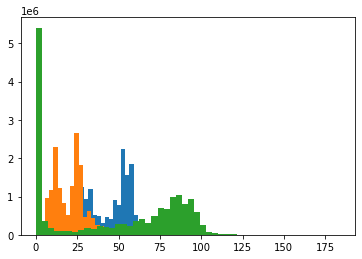

In [11]:
#rank.otsu(I, footprint)
_ = plt.hist((Green).flatten(), bins = 50)
_ = plt.hist((Red).flatten(), bins = 50)
_ = plt.hist((bf).flatten(), bins = 50)
#plt.imshow(bf)

  0%|          | 0/3 [00:00<?, ?it/s]

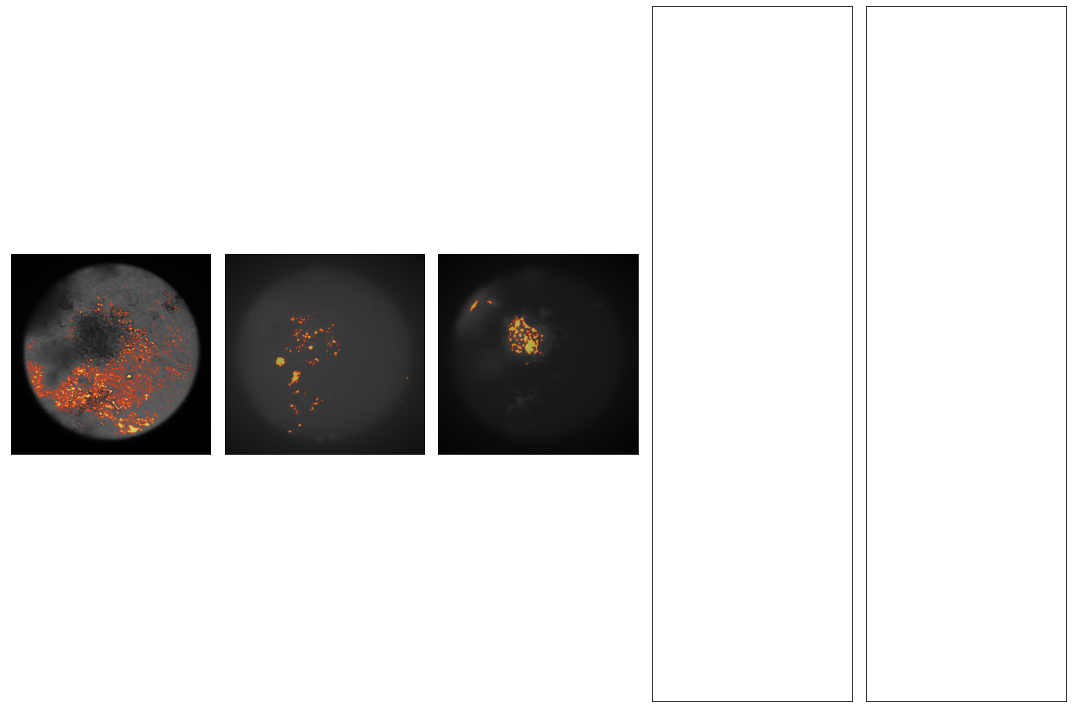

In [14]:
#files = figs[:]
files = [bf, Green, Red]
fig,ax = plt.subplots(int(np.ceil(len(files)/5)),5,figsize=(15,10))

ax = ax.ravel()
for idx,I in tqdm(enumerate(files),total=len(files)):
    #I = plt.imread(i)
    I = I[:,:,0]
    # global thres    
    block_size = 301    
    glob_thresh = threshold_otsu(I)
    binary_local = I > glob_thresh    
    radius = 31    
    footprint = morphology.disk(radius)
    
    # find local thres and use that info    
    # to add extra detail to large blobs    
    
    local_otsu = rank.otsu(I.copy(), footprint)
    lo = I>=local_otsu    
    l1 = np.zeros_like(lo)
    l1[binary_local] = lo[binary_local]
    
    # could/should be improved    
    radius = 2    
    footprint = morphology.disk(radius)
    l2 = morphology.erosion(l1,footprint)
    l3 = morphology.closing(l2,footprint)
    
    # only the parent hierarchy, cv2.RETR_EXTERNAL    
    contours, _ = cv2.findContours(l3.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # create mask that closes ring shapes    
    blanck = np.zeros((*I.shape,3),dtype=np.uint8)
    I_out = np.tile(I[...,None],(1,1,3))
    m = (cv2.fillPoly(blanck,contours,(255,255,255))[...,0]/255.).astype(bool)
    
    # remove mähmä. Remove too dim stuff from the mask    m2 = np.copy(m)
    m2 = I>np.percentile(I[~m],99)
    m2[~m] = False    # find final contour    
    contours, _ = cv2.findContours(m2.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # remove super small blobs    
    contours = [c for c in contours if cv2.contourArea(c)>0.1]
    
    # remove complex shapes (perimeter is large compared to area)    
    # does not work if the shape of interest is far from circular (or threshold should be made more robust)    
    # Increasing threshold adds more complex shapes    
    
    ##reject Threshold -> 
    
    contours = [c for c in contours if (cv2.arcLength(c,True)/cv2.contourArea(c))<3]
    blanck = np.zeros((*I.shape,3),dtype=np.uint8)
    I_out = np.tile(I[...,None],(1,1,3))
    I_out = cv2.drawContours(I_out, contours, -1, (255,0,0), 3)
    blank = cv2.fillPoly(blanck,contours,(255,255,0))
    ax[idx].imshow(cv2.addWeighted(I_out,1.0,blank,0.4,0))
for a in ax:
    a.set_xticks([])
    a.set_yticks([])
fig.tight_layout()